In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
precios=pd.read_csv('precios_USD.csv')

In [117]:
precios.head(2)

,FECHA,1A_AAPL_*,1A_ADAP_*,1A_ADBE_*,1A_ADSK_*,1A_AMZN_*,1A_ANSS_*,1A_ATHM_N,1A_ATVI_*,1A_AVGO_*,...,1A_TENCH_N,1A_TSU_N,1A_TYL_*,1A_V_*,1A_VIPS_N,1A_VOD_N,1A_WB_N,1A_WNS_N,1A_WPP_N,1A_ZAL_N
0,1/2/2019,157.92,130.14,224.57,128.96,1539.13,143.01,76.28,47.03,253.51,...,39.13,16.10,182.24,132.92,5.45,19.72,58.94,41.10,10.72,26.26
1,1/3/2019,142.19,126.21,215.70,121.85,1500.28,137.64,74.47,45.36,230.96,...,38.95,15.81,176.63,128.13,5.28,19.64,55.97,39.51,10.64,27.74


In [118]:
precios['FECHA']=pd.to_datetime(precios['FECHA'])

In [119]:
precios.set_index('FECHA', inplace=True)
precios=precios.pct_change()
precios.dropna(inplace=True)

In [120]:
precios.head(2)

,1A_AAPL_*,1A_ADAP_*,1A_ADBE_*,1A_ADSK_*,1A_AMZN_*,1A_ANSS_*,1A_ATHM_N,1A_ATVI_*,1A_AVGO_*,1A_BABA_N,...,1A_TENCH_N,1A_TSU_N,1A_TYL_*,1A_V_*,1A_VIPS_N,1A_VOD_N,1A_WB_N,1A_WNS_N,1A_WPP_N,1A_ZAL_N
FECHA,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.099607,-0.030198,-0.039498,-0.055133,-0.025242,-0.037550,-0.023728,-0.035509,-0.088951,-0.044623,...,-0.004600,-0.018012,-0.030784,-0.036037,-0.031193,-0.004057,-0.050390,-0.038686,-0.007463,0.056359
2019-01-04,0.042689,0.039854,0.048632,0.052770,0.050064,0.043737,0.045119,0.039903,0.009829,0.070061,...,0.017715,0.015180,0.019985,0.043081,0.073864,0.019857,0.093979,0.054923,0.020677,0.014059


In [121]:
from sklearn.cluster import KMeans
precios_t=precios.T
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(precios)
preds=clusters.fit_predict(precios)


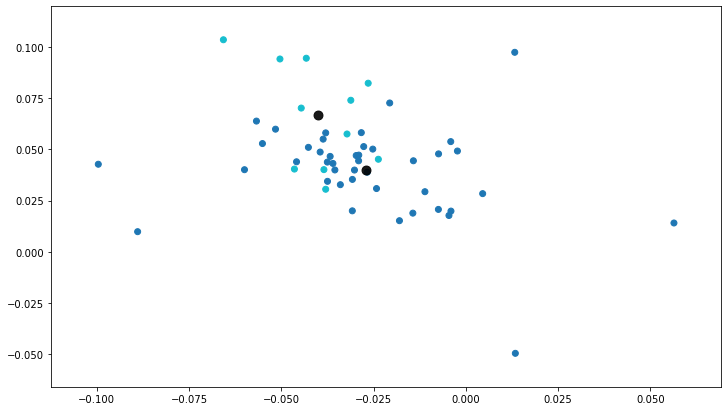

In [149]:
kmeans = KMeans(n_clusters=2
               )
kmeans.fit(precios_t)
y_pred = kmeans.predict(precios_t)

plt.figure(figsize=(12,7))
plt.scatter(np.array(precios_t)[:,0], np.array(precios_t)[:,1], c=y_pred,cmap="tab10" ) 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=80, alpha=0.9,edgecolors=None)


plt.show();


In [97]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [98]:
len(kmeans.labels_)

54

In [99]:
precios_t['cluster']=kmeans.labels_

In [104]:
precios_t[precios_t.cluster==2]
precios_t.head()

FECHA,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,...,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,cluster
1A_AAPL_*,-0.098711,0.036462,-0.010898,0.020492,0.011605,-0.000672,-0.012287,-0.021073,0.022577,0.009299,...,-0.000401,0.001518,-0.004739,0.017672,0.002314,0.018776,-0.005619,0.007403,0.006853,0
1A_ADAP_*,-0.029233,0.033644,-0.014054,0.007310,-0.004378,0.004028,-0.008593,-0.011791,0.013015,0.000358,...,-0.002531,0.007563,0.011216,-0.004930,0.000714,0.001543,-0.002789,-0.005461,0.004913,0
1A_ADBE_*,-0.038542,0.042370,0.004763,0.016341,0.006469,0.006046,-0.003416,-0.018638,0.035390,-0.004569,...,0.006741,0.010541,-0.002734,0.005428,0.003463,0.003683,-0.006473,-0.005958,0.004025,0
1A_ADSK_*,-0.054193,0.046482,0.025619,0.010080,0.016261,-0.004292,-0.002274,-0.020593,0.010471,-0.007139,...,0.014470,0.000680,-0.007775,0.001771,0.006782,0.000748,0.000914,-0.009777,0.000422,0
1A_AMZN_*,-0.024271,0.043793,0.025363,0.018038,-0.003582,-0.005776,-0.011925,-0.020274,0.037603,0.002608,...,-0.001717,0.005144,-0.005890,0.004976,-0.000754,0.043376,-0.004693,-0.010811,0.000064,0


In [102]:
precios_t.cluster.value_counts()

0    43
1    11
Name: cluster, dtype: int64

In [86]:
precios_t.reset_index(inplace=True)

In [ ]:
alldistances = kmeans.fit_transform(precios_t)
dist_data=pd.DataFrame(alldistances)
dist_data

In [ ]:
precios_t=precios_t.T

In [ ]:
precios_t['cluster']=kmeans.labels_

In [ ]:
precios_t.reset_index(inplace=True)

In [87]:
#precios_t=precios_t[['index','cluster']]

In [88]:
precios_t

FECHA,index,cluster
0,1A_AAPL_*,1
1,1A_ADAP_*,1
2,1A_ADBE_*,1
3,1A_ADSK_*,1
4,1A_AMZN_*,1
5,1A_ANSS_*,1
6,1A_ATHM_N,0
7,1A_ATVI_*,1
8,1A_AVGO_*,1
9,1A_BABA_N,0


In [ ]:
precios_t[precios_t.cluster==2]

In [ ]:
precios_t[precios_t.cluster==3]

In [ ]:
np.array(precios_t)[:,1]

In [53]:
import math
def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist

In [ ]:
calculateDistance(np.array(precios_t)[0,0], np.array(precios_t)[0,1], np.array(precios_t)[1,0], np.array(precios_t)[1,1])

In [105]:
Y=np.array(precios_t)[:,1]


In [106]:
X=np.array(precios_t)[:,0]

In [ ]:
precios_t.head()
#precios_t.reset_index(inplace=True)

In [107]:
precios_t['X']=X
precios_t['Y']=Y

In [108]:
precios_t.head()


FECHA,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,...,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,cluster,X,Y
1A_AAPL_*,-0.098711,0.036462,-0.010898,0.020492,0.011605,-0.000672,-0.012287,-0.021073,0.022577,0.009299,...,-0.004739,0.017672,0.002314,0.018776,-0.005619,0.007403,0.006853,0,-0.098711,0.036462
1A_ADAP_*,-0.029233,0.033644,-0.014054,0.007310,-0.004378,0.004028,-0.008593,-0.011791,0.013015,0.000358,...,0.011216,-0.004930,0.000714,0.001543,-0.002789,-0.005461,0.004913,0,-0.029233,0.033644
1A_ADBE_*,-0.038542,0.042370,0.004763,0.016341,0.006469,0.006046,-0.003416,-0.018638,0.035390,-0.004569,...,-0.002734,0.005428,0.003463,0.003683,-0.006473,-0.005958,0.004025,0,-0.038542,0.042370
1A_ADSK_*,-0.054193,0.046482,0.025619,0.010080,0.016261,-0.004292,-0.002274,-0.020593,0.010471,-0.007139,...,-0.007775,0.001771,0.006782,0.000748,0.000914,-0.009777,0.000422,0,-0.054193,0.046482
1A_AMZN_*,-0.024271,0.043793,0.025363,0.018038,-0.003582,-0.005776,-0.011925,-0.020274,0.037603,0.002608,...,-0.005890,0.004976,-0.000754,0.043376,-0.004693,-0.010811,0.000064,0,-0.024271,0.043793


In [109]:
precios_t.reset_index(inplace=True)

base_final=precios_t[['index','X','Y']]
base_final.head()

FECHA,index,X,Y
0,1A_AAPL_*,-0.098711,0.036462
1,1A_ADAP_*,-0.029233,0.033644
2,1A_ADBE_*,-0.038542,0.042370
3,1A_ADSK_*,-0.054193,0.046482
4,1A_AMZN_*,-0.024271,0.043793


In [ ]:
base_final.head()

In [31]:
base_final1=base_final.copy()

In [36]:
base_final1.head()

FECHA,level_0,X,Y
index,,,
1A_AAPL_*,0,-0.098711,0.036462
1A_ADAP_*,1,-0.029233,0.033644
1A_ADBE_*,2,-0.038542,0.042370
1A_ADSK_*,3,-0.054193,0.046482
1A_AMZN_*,4,-0.024271,0.043793


In [33]:
base_final1.reset_index(inplace=True)
base_final1.drop('FECHA',axis=1,inplace=True)

KeyError: "['FECHA'] not found in axis"

In [35]:
base_final1.set_index('index',inplace=True)

In [39]:
top_5=['1A_AAPL_*', '1A_ADAP_*', '1A_ADBE_*', '1A_ADSK_*', '1A_AMZN_*']

In [38]:
base_final1.drop('level_0',axis=1,inplace=True)

In [40]:
base_final1.head(2)

FECHA,X,Y
index,,
1A_AAPL_*,-0.098711,0.036462
1A_ADAP_*,-0.029233,0.033644


In [44]:
top=base_final1.iloc[:5]

In [47]:
top

FECHA,X,Y
index,,
1A_AAPL_*,-0.098711,0.036462
1A_ADAP_*,-0.029233,0.033644
1A_ADBE_*,-0.038542,0.042370
1A_ADSK_*,-0.054193,0.046482
1A_AMZN_*,-0.024271,0.043793


In [48]:
base_final1.drop(top_5,axis=0,inplace=True)

In [50]:
base_final1.head(2)

FECHA,X,Y
index,,
1A_ANSS_*,-0.036592,0.037504
1A_ATHM_N,-0.022756,0.038877


In [59]:
base_final1['Distancia']=base_final1.apply
(calculateDistance(top['X'][0],top['Y'][0],base_final1['X'][:],base_final1['Y'][:]))

TypeError: cannot convert the series to <class 'float'>

In [58]:
top['X'][0]

-0.09871103944960136

In [67]:
import math
#def calculateDistance(x1,y1,x2,y2):  
#     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
#     return dist

def calculaDistancia(df1, df2):
    return math.sqrt((df1["X"].values - df2["X"].values)**2 + (df2["Y"] - df1["Y"].values)**2)

calculaDistancia(top, base_final1)

ValueError: operands could not be broadcast together with shapes (5,) (49,) 

In [64]:
def calculateDistance(x2,y2):  
     dist = math.sqrt((x2 - top['X'][0])**2 + (y2 - top['Y'][0])**2)  
     return dist

In [110]:
top.to_csv('top.csv')
base_final.to_csv('base_final.csv')

In [112]:
base=pd.read_csv('base_final.csv')